In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import seaborn as sns

In [5]:
train_data = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
percent_women=sum(women)/len(women)

print('Survival percentage of Women:',percent_women)

Survival percentage of Women: 0.7420382165605095


In [19]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
percent_men=sum(men)/len(men)

print('Survival percentage of Men:',percent_men)

Survival percentage of Men: 0.18890814558058924


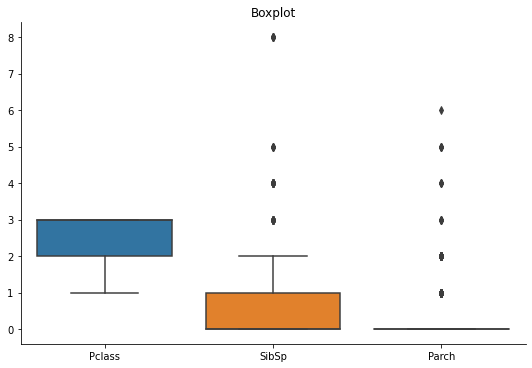

In [42]:
sns.catplot(data=train_data[features], kind="box", aspect=1.5)
plt.title("Boxplot")
plt.show()

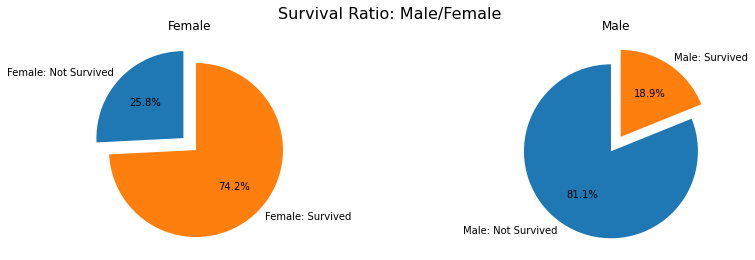

In [48]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 14, 4

kwargs = dict(
    startangle=90,
    explode=(0.1, 0.1),
    autopct='%1.1f%%'
)

data = train_data.groupby('Sex')['Survived'].value_counts().unstack().reset_index()


fig, ax = plt.subplots(1,2)
labels = ['Female: Not Survived', 'Female: Survived', 'Male: Not Survived', 'Male: Survived']

ax[0].pie(data[data.Sex == "female"].drop("Sex",axis=1).values.flatten(), labels=labels[:2],  **kwargs)
ax[1].pie(data[data.Sex == "male"].drop("Sex",axis=1).values.flatten(), labels=labels[2:],  **kwargs)


ax[0].set(title='Female')
ax[1].set(title='Male')


fig.suptitle('Survival Ratio: Male/Female', fontsize=16)
# plt.legend(bbox_to_anchor=(1.15, 1.015), loc='upper left')

# plt.subplots_adjust(wspace=1.5) 
plt.show()

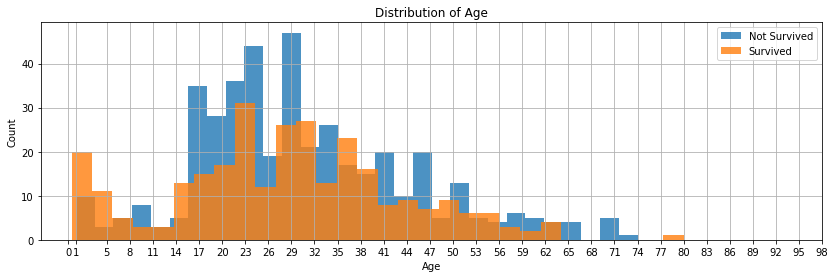

In [51]:
train_data.groupby("Survived")["Age"].hist(alpha=0.8, bins=round(len(train_data["Age"].unique()) / 3))
plt.xlabel("Age")
plt.xticks(np.append(np.arange(5,100,3),[0,1]))
plt.ylabel("Count")
plt.legend(["Not Survived","Survived"])
plt.title("Distribution of Age")
plt.show()

In [43]:
features = ["Pclass", "Sex", "SibSp"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

y = train_data["Survived"]

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
model.fit(X, y)

RandomForestClassifier(max_depth=4, random_state=42)

In [45]:
predictions = model.predict(X_test)

In [46]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_rf.csv', index=False)

Ensemble Method

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import xgboost as xgb

In [27]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = LinearSVC()
xgb_model = xgb.XGBClassifier()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb_model)], voting='hard')
voting_clf.fit(X,y)

C:\Users\MANOJ\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', LinearSVC()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                

In [52]:
predictions = voting_clf.predict(X_test)

In [53]:
output1 = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output1.to_csv('submission1.csv', index=False)

In [54]:
df1=pd.read_csv('submission.csv')
df2=pd.read_csv('submission1.csv')

In [57]:
# Compare the two columns of same dataframe
#df['Comparison'] = df['col1'] == df['col2']

# Print the dataframe
#print(df)

In [58]:
df1['Compare'] = df1['Survived'] == df2['Survived']

# Print the result
print(df1)

     PassengerId  Survived  Compare
0            892         0     True
1            893         1     True
2            894         0     True
3            895         0     True
4            896         1     True
..           ...       ...      ...
413         1305         0     True
414         1306         1     True
415         1307         0     True
416         1308         0     True
417         1309         0     True

[418 rows x 3 columns]


XG BOOST

In [30]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
predictions = xgb_model.predict(X_test)

In [63]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_xgb.csv', index=False)

In [33]:
df3=pd.read_csv('submission_rf.csv')

In [34]:
df4['Compare'] = df4['Survived'] == df3['Survived']

# Print the result
print(df4)

     PassengerId  Survived  Compare
0            892         0     True
1            893         1     True
2            894         0     True
3            895         0     True
4            896         1     True
..           ...       ...      ...
413         1305         0     True
414         1306         1     True
415         1307         0     True
416         1308         0     True
417         1309         0     True

[418 rows x 3 columns]


In [35]:
df4[df4.Compare==False]

,PassengerId,Survived,Compare
32,924,1,False
33,925,1,False
132,1024,1,False
140,1032,1,False
188,1080,1,False
214,1106,1,False
306,1198,0,False
354,1246,1,False
365,1257,1,False


Hyperparameter Optimization

In [76]:
!pip install optuna

In [100]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        svc_deg = trial.suggest_int("svc_deg", 1, 3, log=True)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma="auto", kernel="poly", degree=svc_deg)
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        
        classifier_obj = sklearn.ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10, min_samples_split=2
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)
print(study.best_trial)

[I 2023-06-08 15:07:23,809] A new study created in memory with name: no-name-eaf4cd5c-025a-4a2c-a7c9-577c3b766820


In [ ]:
study.best_params

In [ ]:
study.best_value

Assumption 

In [9]:
df4=pd.read_csv('gender_submission.csv')

In [11]:
df4

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [17]:
y_test=df4['Survived']

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9784688995215312
